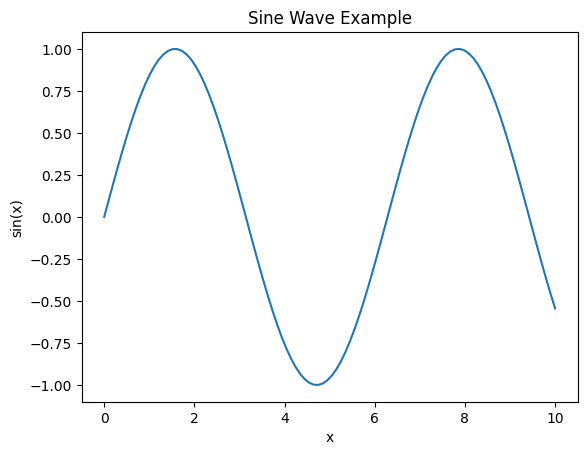

In [1]:
%matplotlib inline
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plot it
plt.plot(x, y)
plt.title("Sine Wave Example")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.show()


.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

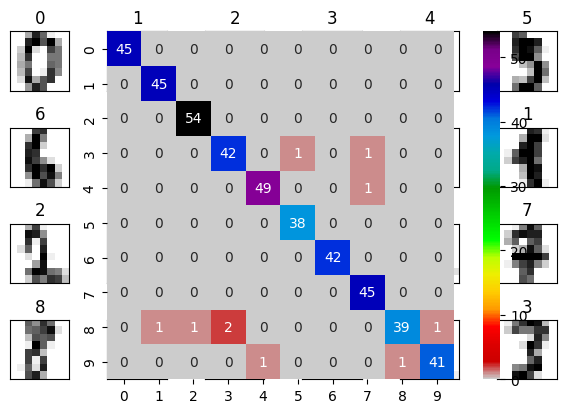

In [2]:
# This file contains Sections 15.2 and 15.3 and all of their subsections and Self Check exercises

# 15.2 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 1

# 15.2.2 Loading the Dataset
from sklearn.datasets import load_digits

digits = load_digits()

# Displaying the Description
print(digits.DESCR)

# Checking the Sample and Target Sizes
digits.target[::100]

digits.data.shape

digits.target.shape

# A Sample Digit Image
digits.images[13]

# Preparing the Data for Use with Scikit-Learn
digits.data[13]

# 15.2.2 Self Check
# Exercise 3
digits.images[22]

digits.target[22]

# 15.2.3 Visualizing the Data

# Creating the Diagram
import matplotlib.pyplot as plt

figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))

# Displaying Each Image and Removing the Axes Labels 

for item in zip(axes.ravel(), digits.images, digits.target):
    axes, image, target = item
    axes.imshow(image, cmap=plt.cm.gray_r)
    axes.set_xticks([])  # remove x-axis tick marks
    axes.set_yticks([])  # remove y-axis tick marks
    axes.set_title(target)
plt.tight_layout()     

# 15.2.3 Self Check
# Exercise 2
axes = plt.subplot()

image = plt.imshow(digits.images[22], cmap=plt.cm.gray_r)

xticks = axes.set_xticks([])

yticks = axes.set_yticks([])

# 15.2.4 Splitting the Data for Training and Testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     digits.data, digits.target, random_state=11)

# Training and Testing Set Sizes
X_train.shape

X_test.shape

# 15.2.5 Creating the Model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# 15.2.6 Training the Model
knn.fit(X=X_train, y=y_train)

# 15.2.7 Predicting Digit Classes
predicted = knn.predict(X=X_test)

expected = y_test

predicted[:20]

expected[:20]

wrong = [(p, e) for (p, e) in zip(predicted, expected) if p != e]

wrong

# 15.2.7 Self Check
# Exercise 1
print(f'{(len(expected) - len(wrong)) / len(expected):.2%}')

# Exercise 2
wrong = []

for p, e in zip(predicted, expected):
      if p != e:
          wrong.append((p, e))

wrong

# 15.3 Case Study: Classification with k-Nearest Neighbors and the Digits Dataset, Part 2

# 15.3.1 Metrics for Model Accuracy

# Estimator Method score
print(f'{knn.score(X_test, y_test):.2%}')

# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_true=expected, y_pred=predicted)

confusion

# Classification Report
from sklearn.metrics import classification_report

names = [str(digit) for digit in digits.target_names]

print(classification_report(expected, predicted, 
       target_names=names))

# Visualizing the Confusion Matrix
import pandas as pd

confusion_df = pd.DataFrame(confusion, index=range(10),
     columns=range(10))

import seaborn as sns

axes = sns.heatmap(confusion_df, annot=True, 
                    cmap='nipy_spectral_r')

# 15.3.2 K-Fold Cross-Validation

# KFold Class
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, random_state=11, shuffle=True)

# Using the KFold Object with Function cross_val_score
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=knn, X=digits.data, 
     y=digits.target, cv=kfold)

scores

print(f'Mean accuracy: {scores.mean():.2%}')

print(f'Accuracy standard deviation: {scores.std():.2%}')

# 15.3.3 Running Multiple Models to Find the Best One
from sklearn.svm import SVC

from sklearn.naive_bayes import GaussianNB

estimators = {
     'KNeighborsClassifier': knn, 
     'SVC': SVC(gamma='scale'),
     'GaussianNB': GaussianNB()}

for estimator_name, estimator_object in estimators.items():
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     scores = cross_val_score(estimator=estimator_object, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'{estimator_name:>20}: ' + 
           f'mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')

# 15.3.4 Hyperparameter Tuning
for k in range(1, 20, 2):
     kfold = KFold(n_splits=10, random_state=11, shuffle=True)
     knn = KNeighborsClassifier(n_neighbors=k)
     scores = cross_val_score(estimator=knn, 
         X=digits.data, y=digits.target, cv=kfold)
     print(f'k={k:<2}; mean accuracy={scores.mean():.2%}; ' +
           f'standard deviation={scores.std():.2%}')


(C) Copyright 2019 by Deitel & Associates, Inc. and                    #
Pearson Education, Inc. All Rights Reserved.                           #
                                                                       #
DISCLAIMER: The authors and publisher of this book have used their     #
best efforts in preparing the book. These efforts include the          #
development, research, and testing of the theories and programs        #
to determine their effectiveness. The authors and publisher make       #
no warranty of any kind, expressed or implied, with regard to these    #
programs or to the documentation contained in these books. The authors #
and publisher shall not be liable in any event for incidental or       #
consequential damages in connection with, or arising out of, the       #
furnishing, performance, or use of these programs.                     #
#########################################################################